## Ari Boyarsky
## PSET 6

In [22]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

## Differentiation

In [103]:
#Q1
x = sy.symbols('x')
expr = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
d = sy.diff(expr,x)
print(d)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))


In [110]:
#Q2
def forward_1(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return f(xs+h)-f(xs) / h

def forward_2(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return -3*f(xs)+4*f(xs+h)-2*f(xs+2*h) / 2*h

def bkwd_1(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return f(xs)-f(xs-h) / h

def bkwd_2(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return 3*f(xs)-4*f(xs-h)+f(xs-2*h) / 2*h

def center_2(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return f(xs+h)-f(xs-h) / 2*h

def center_4(d, xs, h):
    f = sy.lambdify(x, d, "numpy")
    return f(xs-2*h)-8*f(xs-h)+ 8*f(xs+h)-f(xs+2*h) / 12*h

In [111]:
xs = np.linspace(-np.pi, np.pi, 50)

In [114]:
forward_1(expr, xs, 0.01)
forward_2(d, xs, 0.01)
bkwd_1(d, xs, 0.01)
bkwd_2(d, xs, 0.01)
center_2(d, xs, 0.01)
center_4(d,xs,0.01)

array([  1.05807054,   1.30922753,   1.58914359,   1.87158386,
         2.0968717 ,   2.15640367,   1.88695414,   1.09700812,
        -0.34949909,  -2.39623768,  -4.69325533,  -6.79170184,
       -13.21973908,   0.68451083,   0.0549348 ,   0.13143438,
         0.25746673,   0.38490431,   0.50729806,   0.62046748,
         0.71875075,   0.79583383,   0.84587523,   0.86393494,
         0.84568244,   0.78694905,   0.68391642,   0.53451833,
         0.34102818,   0.1129627 ,  -0.13132123,  -0.36606152,
        -0.56320635,  -0.6997825 ,  -0.76429197,  -0.75899312,
        -0.69717493,  -0.5973102 ,  -0.47718869,  -0.35024249,
        -0.22448192,  -0.10318893,   0.01375728,   0.12869059,
         0.2454039 ,   0.36881144,   0.50485011,   0.66036483,
         0.84263867,   1.05807054])

In [4]:
def build(diff_fn, fn, x_vals, h):

    return diff_fn(fn,x_vals, h)

def plot_convergence(pt):

    f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))

    h_vals = np.logspace(-3, 0, 10)
    y_vals = np.empty((10,6))

    labels = ['1 forward', '2 forward', '1 backward', '2 backward', '1 centered', '2 centered']

    for i in range(10):
        t = build(forward_1, f, pt, h_vals[i] )
        y_vals[i][0] = build(forward_1, f, pt, h_vals[i] )
        y_vals[i][1] = build(forward_2, f, pt, h_vals[i] )
        y_vals[i][2] = build(backward_1, f, pt, h_vals[i] )
        y_vals[i][3] = build(backward_2, f, pt, h_vals[i] )
        y_vals[i][4] = build(centered_1, f, pt, h_vals[i] )
        y_vals[i][5] = build(centered_2, f, pt, h_vals[i] )

    for i in range(6):
        l = "Order " + labels[i]
        plt.loglog(h_vals, y_vals[:,i], label=l, marker="o")


    plt.legend()
    plt.ylabel("Absolute error")
    plt.xlabel("h")
    plt.title("Convergence through time")

In [12]:
# 4
d = np.load('plane.npy')

ALPHA = 1
BETA = 2
d_rad = np.copy(d)
d_rad[:,ALPHA] = np.deg2rad(d[:,ALPHA])
d_rad[:,BETA] = np.deg2rad(d[:,BETA])
x_t = 500 * np.tan(d_rad[:,BETA]) / (np.tan(d_rad[:,BETA]) - np.tan(d_rad[:,ALPHA]))
y_t = 500 * np.tan(d_rad[:,BETA])*np.tan(d_rad[:,ALPHA]) / (np.tan(d_rad[:,BETA]) - np.tan(d_rad[:,ALPHA]))

x_t_p1 = np.append(x_t[1:], [0])
x_t_m1 = np.append([0], x_t[:-1])
y_t_p1 = np.append(y_t[1:], [0])
y_t_m1 = np.append([0], y_t[:-1])

x_prime = np.empty((d.shape[0]))
x_prime[1:-1] = (1/2)*(x_t_p1[1:-1] - x_t_m1[1:-1])
x_prime[0] = (1/2)*(x_t_p1[0] - x_t[0])
x_prime[-1] = (1/2)*(-x_t_m1[-1] + x_t[-1])

y_prime = np.empty((d.shape[0]))
y_prime[1:-1] = (1/2)*(y_t_p1[1:-1] - y_t_m1[1:-1])
y_prime[0] = (1/2)*(y_t_p1[0] - y_t[0])
y_prime[-1] = (1/2)*(-y_t_m1[-1] + y_t[-1])

speed = np.sqrt(y_prime**2 + x_prime**2)
print(speed)

[ 23.21210031  47.00103938  48.99880514  50.09944163  48.29035084
  51.56455905  53.92303355  25.75740028]


In [13]:
# q6
def J(f, pt, h):
    m = len(f)
    n = pt.shape[0]
    I = np.identity(n)
    J = np.empty((m, n))
    for i in range(m):
        fn = f[i]
        for j in range(n):
            J[i,j] = (fn(pt + h*I[:,j]) - fn(pt - h*I[:,j])) / (2*h)
    return J

In [14]:
fn1 = lambda vec: vec[0]**2
fn2 = lambda vec: vec[0]**3 - vec[1] 
fn = [fn1, fn2]
pt = np.array([1,2])
fn_J = J(fn, pt, .00000001)
print(fn_J)

[[ 1.99999999  0.        ]
 [ 2.99999999 -0.99999999]]


NameError: name 'timeit' is not defined

In [18]:
# Integration
# 1
def newton_cotes(g, a, b, N, method = "midpoint"):
    '''
    g: a function of x
    a, b: lower and upper bound of integration
    N: number of intervals cutted
    method: \in {"midpoint", "trapezoid", "Simpsons"}
    '''
    
    if method == "midpoint":
        # Since there are N intervals, there should be N midpoints
        midpoints = np.zeros(N)
        temp = 0
        for i in range(N):
            midpoints[i] = a + (2*i+1)*(b-a)/(2*N)
            temp += g(midpoints[i])    
        result = (b-a)/N * temp
    elif method == "trapezoid":
        # N intervals would yield N+1 points
        endpoints = np.zeros(N+1)
        for i in range(N+1):
            endpoints[i] = a + (b-a)*i/N
        temp = 0
        for i in range(1, N):
            temp += g(endpoints[i])
        result = (b-a)/(2*N)*(g(a) + 2 * temp + g(b))
    elif method == "Simpsons":
        #For N intervals there are N+1 endpoints and N sample points
        samplepoints = np.zeros(2*N+1)
        for i in range(2*N+1):
            samplepoints[i] = a + i *(b-a) / (2*N) 
        temp = 0
        for i in range(1, 2*N):
            # loop from i = 1 to 2N-1
            if i%2 == 1:
                # if i is odd
                temp += 4*g(samplepoints[i])
            else:
                # i is even
                temp += 2*g(samplepoints[i])
        result = (b-a)/3/(2*N)*(g(a) + temp + g(b))
        # note that the distance h between two points is (b-a)/(2N)
    else:
        raise ValueError
    return result

In [19]:
g = lambda x : 0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2*x +1
print(newton_cotes(g, -10, +10, 100))

4371.96476


In [20]:
# q2
from scipy.stats import norm
def normal_approximation(mu, sigma, N, k):
    nodes = np.linspace(mu-k*sigma, mu+k*sigma, N)
    weights = np.ones(N)
    # N must be greater than or equal to 2
    weights[0] = norm.cdf((nodes[0]+nodes[1])/2, mu, sigma)
    weights[-1] = 1-norm.cdf((nodes[-1]+nodes[-2])/2, mu, sigma)
    
    pdf = lambda x : 1/ np.sqrt(2*np.pi * sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    for i in range(1, N-1):
        zmin = (nodes[i-1]+nodes[i])/2
        zmax = (nodes[i]+nodes[i+1])/2
        weights[i] = newton_cotes(pdf, zmin, zmax, 400, method = "Simpsons")
        
    return nodes, weights

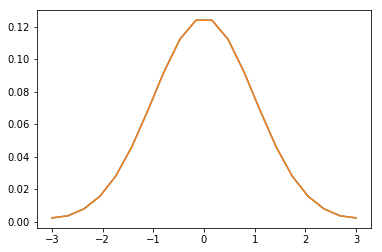

In [24]:
x,y = normal_approximation(0, 1, 20, 3)
plt.plot(x, y)
plt.show()